
## 5.2. Call TensorFlow from MATLAB

Let’s introduce the use of Tensorflow with the [getting started tutorial](https://www.tensorflow.org/tutorials/keras/classification):


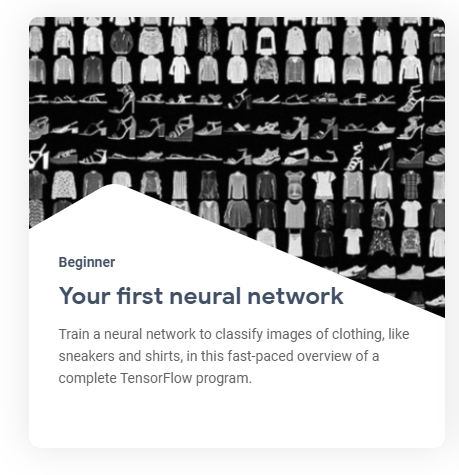


This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories.


The images show individual articles of clothing at low resolution (28 by 28 pixels).


This example is curated by Zalando, under a MIT License.


Setup on MATLAB Online to retrieve and install the necessary Python packages:


In [1]:
% Check if we are running on MATLAB Online
if ~isDesktop
    setuppip
    pkg = "tensorflow==2.8";
    pipinstall(pkg)
    pipshow(pkg)
end


First let’s **load tensorflow** explicitely, and check the version of tensorflow installed:


In [2]:
tf = py.importlib.import_module('tensorflow');
pyrun('import tensorflow as tf; print(tf.__version__)')

2.8.0


Then let’s  **retrieve the dataset**


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

fashion_mnist = 
  Python module with properties:
    load_data: [1x1 py.function]
    <module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\ydebray\\AppData\\Local\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
train_test_tuple = fashion_mnist.load_data();


And **store the images and labels** for training and testing separately.


Indexing into [Python tuples in MATLAB](https://www.mathworks.com/help/matlab/matlab_external/pythontuplevariables.html) is done with curly brackets: <samp>pytuple{1}</samp>


(Remember that indexing starts at 1 in MATLAB unlike Python starting at 0)


In [5]:
% ND array containing gray scale images (values from 0 to 255)
train_images = train_test_tuple{1}{1};
test_images = train_test_tuple{2}{1};
% values from 0 to 9: can be converted as uint8
train_labels = train_test_tuple{1}{2};
test_labels = train_test_tuple{2}{2};


Define the list of classes directly in MATLAB:


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names = 1x10 string    
"T-shirt/top""Trouser"    "Pullover"   "Dress"      "Coat"       "Sandal"     "Shirt"      "Sneaker"    "Bag"        "Ankle boot"


If we want to use the index of the training labels from the list above in MATLAB, we need to shift the range from [0:9] to [1:10]


In [7]:
tl = uint8(train_labels)+1; % shifting range from [0:9] to [1:10]
l = length(tl)

l = 60000


The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:


In [8]:
train_images_m = uint8(train_images);
size(train_images_m)

ans = 1x3    
       60000          28          28


To **resize a single image** from the dataset, use the reshape function:


In [9]:
size(train_images_m(1,:,:))

ans = 1x3    
     1    28    28

In [10]:
size(reshape(train_images_m(1,:,:),[28,28]))

ans = 1x2    
    28    28


You can add a live control to your live script to **explore your dataset**:



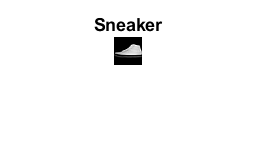

In [11]:
i = 42;
img = reshape(train_images_m(i,:,:),[28,28]);
imshow(img)
title(class_names(tl(i)))


You must  **preprocess the data** before training the network.


If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:


In [12]:
train_images = train_images / 255;
test_images = test_images / 255;


Finally, **build and train the model** with the function specified in the <u>tf_helper</u> file / module:


In [13]:
model = py.tf_helper.build_model();


You can look at the architecture of the model by retrieving the layers in a cell array:


In [14]:
cell(model.layers)

In [15]:
py.tf_helper.compile_model(model);
py.tf_helper.train_model(model,train_images,train_labels)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 3.6053 - accuracy: 0.6907
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6842 - accuracy: 0.7592
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5779 - accuracy: 0.8008
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5257 - accuracy: 0.8181
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5098 - accuracy: 0.8247
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4863 - accuracy: 0.8308
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4749 - accuracy: 0.8371
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4782 - accuracy: 0.8356
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4701 - accuracy: 0.8378
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.468


**Evaluate the model** by comparing how the model performs on the test dataset:


In [16]:
test_tuple = py.tf_helper.evaluate_model(model,test_images,test_labels)

313/313 - 0s - loss: 0.5592 - accuracy: 0.8086 - 412ms/epoch - 1ms/step
test_tuple = 
  Python tuple with values:
    (0.5592399835586548, 0.8086000084877014)
    Use string, double or cell function to convert to a MATLAB array.

In [17]:
test_acc = test_tuple{2}

test_acc = 0.8086


**Test the model** on the first image from the test dataset:


In [18]:
test_images_m = uint8(test_images);
prob = py.tf_helper.test_model(model,py.numpy.array(test_images_m(1,:,:)))

prob = 
  Python ndarray:
    0.0000    0.0000    0.0000    0.0000    0.0000    0.0002    0.0000    0.0033    0.0000    0.9965
    Use details function to view the properties of the Python object.
    Use single function to convert to a MATLAB array.

In [19]:
[argvalue, argmax] = max(double(prob))

argvalue = 0.9965
argmax = 10


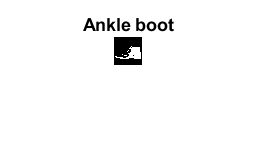

In [20]:
imshow(reshape(test_images_m(1,:,:),[28,28])*255)
title(class_names(argmax))

## Helper functions

In [21]:
% clear classes
mod = py.importlib.import_module('tf_helper');
py.importlib.reload(mod);